<a href="https://colab.research.google.com/github/nithyajv/Covid-analysis/blob/main/Covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***IMPORTING DATA***

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid.csv to covid.csv


In [ ]:
import io
covid = pd.read_csv(io.BytesIO(uploaded['covid.csv']))

***DATA PREPROCESSING***

In [ ]:
covid.drop(['iso_code','new_cases_smoothed','new_deaths_smoothed','new_cases_smoothed_per_million','new_deaths_per_million','new_deaths_smoothed_per_million','icu_patients','hosp_patients','weekly_icu_admissions','weekly_hosp_admissions','total_tests_per_thousand','new_tests_smoothed','tests_per_case','positive_rate','tests_units','total_boosters','new_vaccinations_smoothed','total_vaccinations_per_hundred','new_vaccinations_smoothed_per_million','stringency_index','population','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','human_development_index','excess_mortality_cumulative','excess_mortality','excess_mortality_cumulative_per_million'],axis=1,inplace=True)

In [ ]:
covid.head(10)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,people_vaccinated,people_fully_vaccinated,new_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population_density,excess_mortality_cumulative_absolute
0,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.126,0.126,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,NaN
1,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.126,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,NaN
2,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.126,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,NaN
3,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.126,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,NaN
4,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.126,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,NaN
5,Asia,Afghanistan,2020-02-29,5.0,0.0,NaN,NaN,0.126,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,NaN
6,Asia,Afghanistan,2020-03-01,5.0,0.0,NaN,NaN,0.126,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,NaN
7,Asia,Afghanistan,2020-03-02,5.0,0.0,NaN,NaN,0.126,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,NaN
8,Asia,Afghanistan,2020-03-03,5.0,0.0,NaN,NaN,0.126,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,NaN
9,Asia,Afghanistan,2020-03-04,5.0,0.0,NaN,NaN,0.126,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,NaN


In [ ]:
covid.duplicated().sum()

20

In [ ]:
covid.drop_duplicates(inplace=True)

In [ ]:
covid.rename(columns = {'location': 'Country'}, inplace=True)

In [ ]:
covid

,continent,Country,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,people_vaccinated,people_fully_vaccinated,new_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population_density,excess_mortality_cumulative_absolute
0,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.126,0.126,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,NaN
1,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.126,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,NaN
2,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.126,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,NaN
3,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.126,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,NaN
4,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.126,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170185,Africa,Zimbabwe,2022-03-17,243650.0,0.0,5418.0,0.0,16144.132,0.000,358.994,...,4413298.0,3440370.0,7090.0,29.24,22.80,2.26,3314.0,0.022,42.729,NaN
170186,Africa,Zimbabwe,2022-03-18,244012.0,362.0,5420.0,2.0,16168.118,23.986,359.127,...,4416878.0,3443003.0,10213.0,29.27,22.81,2.28,3203.0,0.021,42.729,NaN
170187,Africa,Zimbabwe,2022-03-19,244452.0,440.0,5426.0,6.0,16197.272,29.154,359.524,...,4418032.0,3443906.0,3136.0,29.27,22.82,2.29,3046.0,0.020,42.729,NaN
170188,Africa,Zimbabwe,2022-03-20,244452.0,0.0,5426.0,0.0,16197.272,0.000,359.524,...,4418956.0,3444793.0,2915.0,29.28,22.83,2.30,2961.0,0.020,42.729,NaN


In [ ]:
covid.shape

(170190, 30)

In [ ]:
covid.dtypes

continent                                      object
Country                                        object
date                                           object
total_cases                                   float64
new_cases                                     float64
total_deaths                                  float64
new_deaths                                    float64
total_cases_per_million                       float64
new_cases_per_million                         float64
total_deaths_per_million                      float64
reproduction_rate                             float64
icu_patients_per_million                      float64
hosp_patients_per_million                     float64
weekly_icu_admissions_per_million             float64
weekly_hosp_admissions_per_million            float64
total_tests                                   float64
new_tests                                     float64
new_tests_per_thousand                        float64
new_tests_smoothed_per_thous

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170190 entries, 0 to 170189
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   continent                                   160026 non-null  object 
 1   Country                                     170190 non-null  object 
 2   date                                        170190 non-null  object 
 3   total_cases                                 166941 non-null  float64
 4   new_cases                                   166778 non-null  float64
 5   total_deaths                                148965 non-null  float64
 6   new_deaths                                  148997 non-null  float64
 7   total_cases_per_million                     166167 non-null  float64
 8   new_cases_per_million                       166004 non-null  float64
 9   total_deaths_per_million                    148204 non-null  float64
 

In [ ]:
covid.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,...,people_vaccinated,people_fully_vaccinated,new_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population_density,excess_mortality_cumulative_absolute
count,1.669410e+05,1.667780e+05,1.489650e+05,148997.000000,166167.000000,166004.000000,148204.000000,129053.000000,23757.000000,25113.000000,...,4.431000e+04,4.163400e+04,3.847700e+04,44310.000000,41634.000000,19161.000000,8.734400e+04,87344.000000,151270.000000,5.887000e+03
mean,2.668080e+06,1.201693e+04,5.901270e+04,169.953529,31525.244952,174.685959,524.070217,0.994103,23.580423,168.063626,...,9.220592e+07,7.347211e+07,1.165763e+06,38.739013,33.466258,13.414882,2.061228e+05,0.145297,464.066343,3.877151e+04
std,1.638432e+07,8.700691e+04,3.089573e+05,829.198197,56686.018770,717.092908,802.017998,0.367911,27.751179,208.436226,...,4.137405e+08,3.447353e+08,4.337023e+06,29.150979,28.048474,18.182937,1.150480e+06,0.242159,2142.627362,1.072453e+05
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.001000,0.000000,0.000000,-0.040000,0.000000,0.000000,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.137000,-3.772610e+04
25%,2.109000e+03,1.000000e+00,8.200000e+01,0.000000,653.779000,0.036000,19.364000,0.800000,3.956000,26.908000,...,3.979695e+05,2.843895e+05,6.170000e+03,9.142500,5.450000,0.010000,4.080000e+02,0.023000,36.253000,-5.250000e+01
50%,2.781900e+04,7.900000e+01,8.040000e+02,2.000000,4970.281000,11.460000,135.342000,0.990000,13.161000,86.977000,...,3.090314e+06,2.437858e+06,4.119600e+04,37.820000,28.460000,3.590000,3.760500e+03,0.070000,85.129000,3.623900e+03
75%,3.124740e+05,1.074000e+03,7.484000e+03,19.000000,40292.050000,102.689250,742.761500,1.180000,34.199000,229.840000,...,1.835570e+07,1.431744e+07,2.773070e+05,65.480000,59.320000,23.020000,2.595525e+04,0.186000,212.865000,2.674190e+04
max,4.721148e+08,4.115815e+06,6.093828e+06,18021.000000,706541.904000,51427.491000,6352.749000,6.160000,177.282000,1544.082000,...,5.042612e+09,4.501385e+09,5.449418e+07,124.740000,121.990000,93.930000,2.137757e+07,11.750000,20546.766000,1.111864e+06


In [ ]:
covid.nunique()

continent                                          6
Country                                          238
date                                             811
total_cases                                    92212
new_cases                                      22399
total_deaths                                   36328
new_deaths                                      4517
total_cases_per_million                       124486
new_cases_per_million                          68427
total_deaths_per_million                       80154
reproduction_rate                                384
icu_patients_per_million                       10755
hosp_patients_per_million                      17932
weekly_icu_admissions_per_million               3248
weekly_hosp_admissions_per_million              9307
total_tests                                    69846
new_tests                                      37219
new_tests_per_thousand                         11901
new_tests_smoothed_per_thousand               

In [ ]:
covid.corr()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,...,people_vaccinated,people_fully_vaccinated,new_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population_density,excess_mortality_cumulative_absolute
total_cases,1.000000,0.817136,0.962510,0.704347,0.102122,0.031729,0.126115,0.004930,0.141681,0.051427,...,0.849259,0.830798,0.735407,0.098120,0.069502,-0.063735,0.658477,-0.007023,-0.017026,0.796198
new_cases,0.817136,1.000000,0.744904,0.661807,0.093707,0.089811,0.092360,0.024464,0.172644,0.125852,...,0.628413,0.642398,0.506944,0.080173,0.077240,0.041139,0.405450,-0.025878,-0.014610,0.471312
total_deaths,0.962510,0.744904,1.000000,0.772735,0.068608,0.011137,0.143219,0.007282,0.161515,0.051495,...,0.831650,0.799070,0.778830,0.069607,0.033034,-0.134689,0.719964,0.009423,-0.020144,0.928109
new_deaths,0.704347,0.661807,0.772735,1.000000,0.012738,0.009602,0.068099,0.007584,0.304423,0.195656,...,0.521729,0.476873,0.628228,-0.086437,-0.105665,-0.162381,0.627965,0.000591,-0.022076,0.494477
total_cases_per_million,0.102122,0.093707,0.068608,0.012738,1.000000,0.464522,0.689260,0.009073,0.209027,0.259693,...,-0.055950,-0.050063,-0.130112,0.501592,0.520009,0.623528,-0.063065,-0.066882,0.003511,0.153177
new_cases_per_million,0.031729,0.089811,0.011137,0.009602,0.464522,1.000000,0.218065,0.108991,0.161719,0.247732,...,-0.035830,-0.030453,-0.068515,0.269603,0.300658,0.474339,-0.035013,-0.045422,0.008932,0.004876
total_deaths_per_million,0.126115,0.092360,0.143219,0.068099,0.689260,0.218065,1.000000,0.013081,0.402721,0.385117,...,-0.042016,-0.042459,-0.110831,0.313577,0.269174,0.123100,-0.036278,0.017669,-0.016880,0.364003
reproduction_rate,0.004930,0.024464,0.007282,0.007584,0.009073,0.108991,0.013081,1.000000,-0.157984,-0.133255,...,0.004187,0.008063,0.007658,0.084188,0.117840,0.034039,0.014483,0.002558,0.011770,-0.053438
icu_patients_per_million,0.141681,0.172644,0.161515,0.304423,0.209027,0.161719,0.402721,-0.157984,1.000000,0.774031,...,0.026863,0.001407,0.050409,-0.291164,-0.286887,-0.105651,0.103540,0.082062,-0.155476,0.158927
hosp_patients_per_million,0.051427,0.125852,0.051495,0.195656,0.259693,0.247732,0.385117,-0.133255,0.774031,1.000000,...,-0.058878,-0.068513,-0.059030,-0.275245,-0.211959,0.137828,-0.026350,-0.074075,-0.088737,0.081944


***DATA VISUALIZATION***

In [ ]:
confirmed_cases = covid.groupby(by='Country').sum()['total_cases'].sort_values(ascending=False).reset_index()

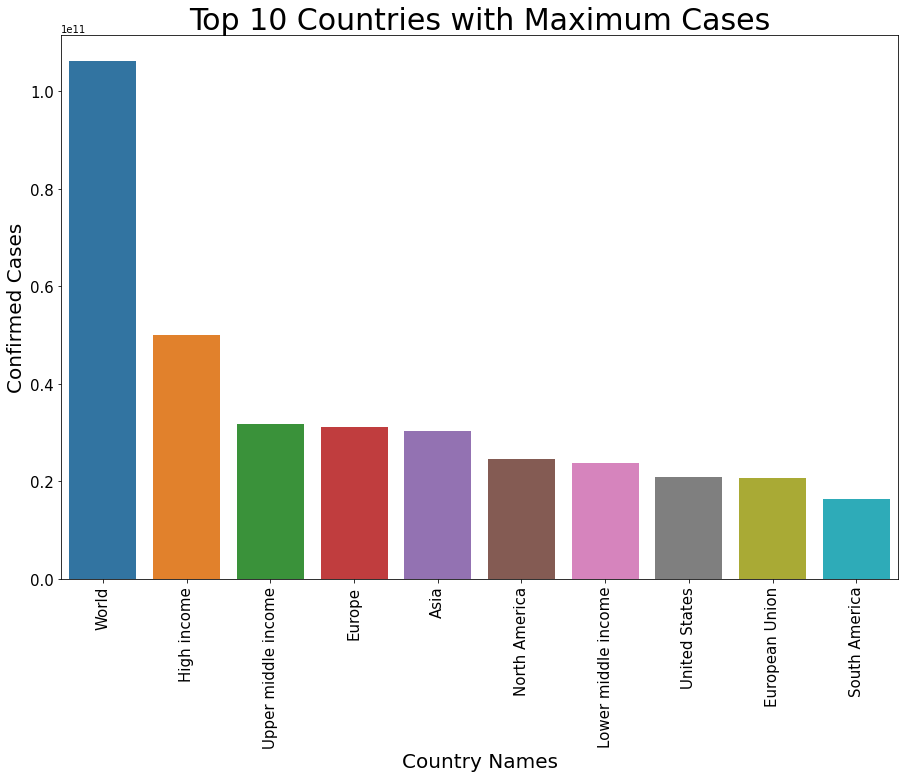

In [ ]:
plt.figure(figsize = (15,10))
plt.title('Top 10 Countries with Maximum Cases', size=30)
sns.barplot(x='Country', y='total_cases', data=confirmed_cases.head(10)) 
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.xlabel('Country Names', size=20)
plt.ylabel('Confirmed Cases', size=20)
plt.show()

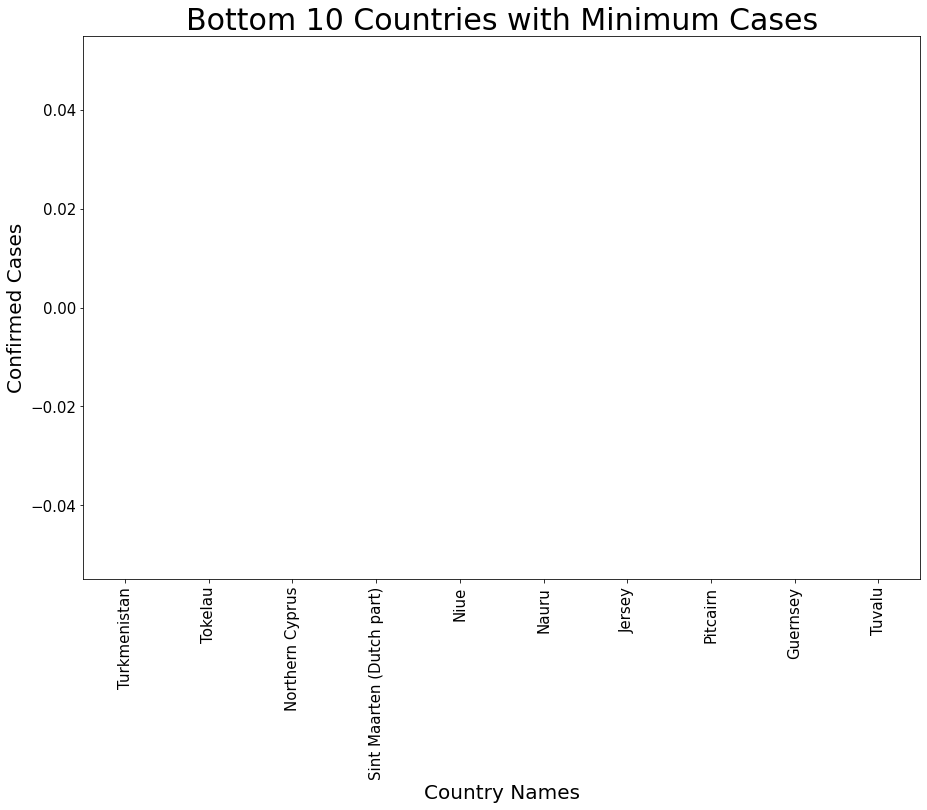

In [ ]:
plt.figure(figsize = (15,10))
plt.title('Bottom 10 Countries with Minimum Cases', size=30)
sns.barplot(x='Country', y='total_cases', data=confirmed_cases.tail(10)) 
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.xlabel('Country Names', size=20)
plt.ylabel('Confirmed Cases', size=20)
plt.show()

In [ ]:
death_cases = covid.groupby(by='Country').sum()['total_deaths'].sort_values(ascending=False).reset_index()

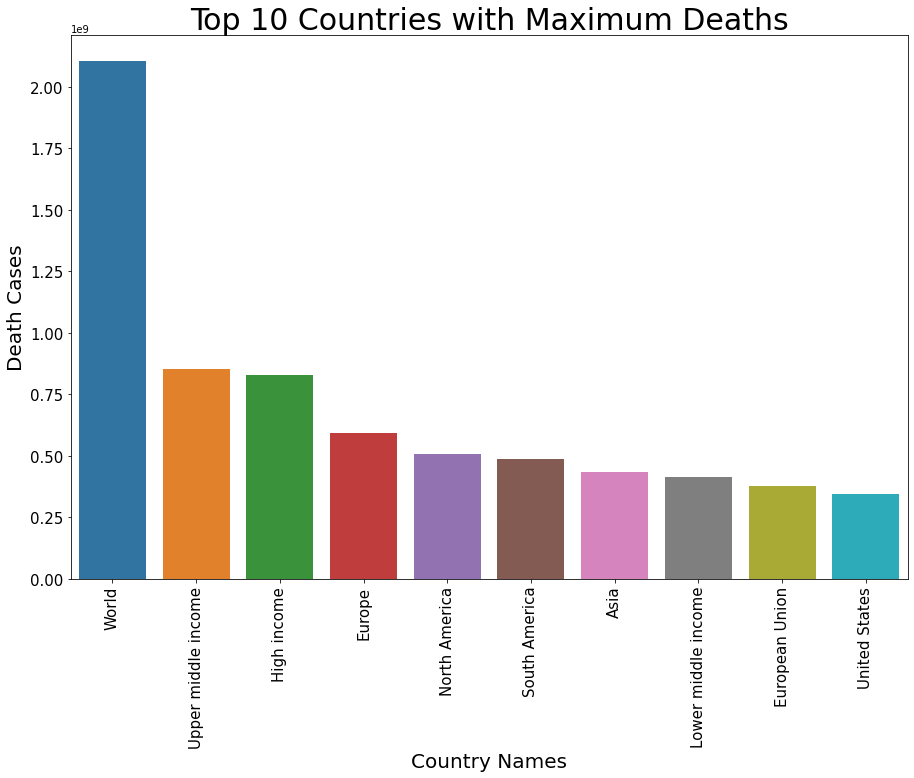

In [ ]:
plt.figure(figsize = (15,10))
plt.title('Top 10 Countries with Maximum Deaths', size=30)
sns.barplot(x='Country', y='total_deaths', data=death_cases.head(10)) 
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.xlabel('Country Names', size=20)
plt.ylabel('Death Cases', size=20)
plt.show()

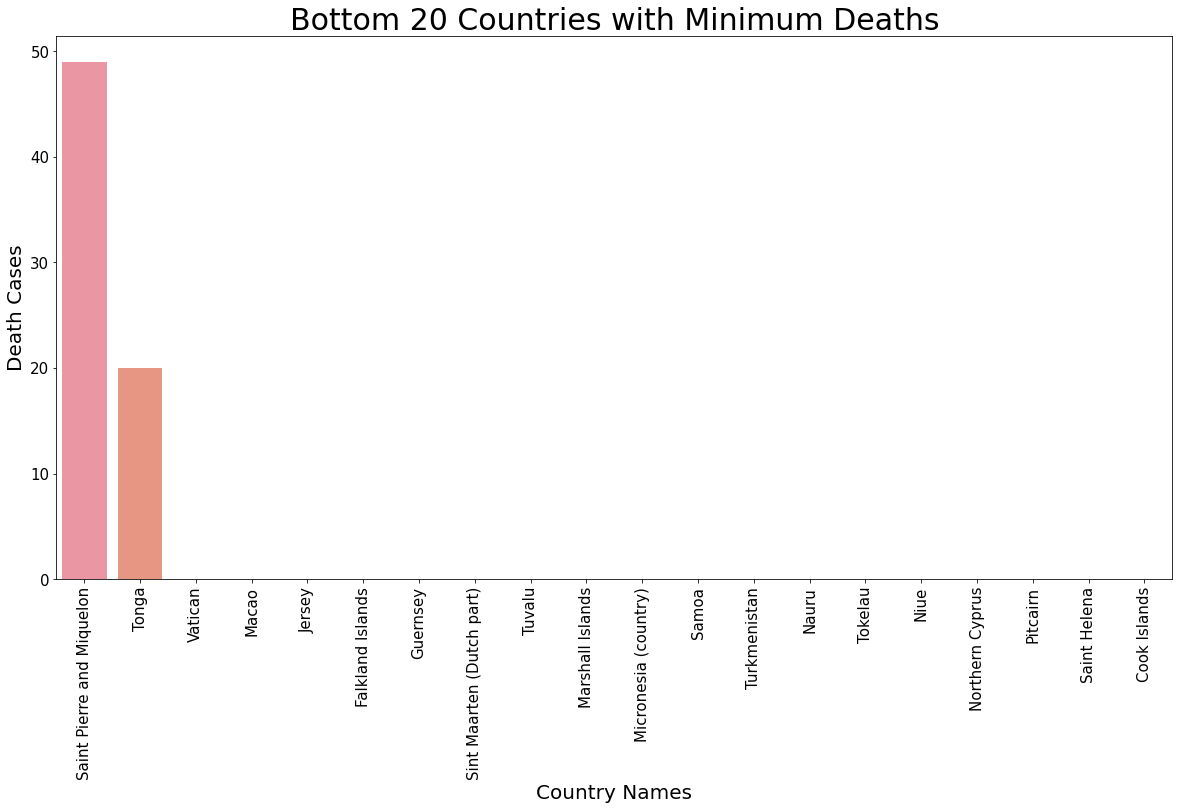

In [ ]:
plt.figure(figsize = (20,10))
plt.title('Bottom 20 Countries with Minimum Deaths', size=30)
sns.barplot(x='Country', y='total_deaths', data=death_cases.tail(20)) 
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.xlabel('Country Names', size=20)
plt.ylabel('Death Cases', size=20)
plt.show()

In [ ]:
active_cases = covid.groupby(by='Country').sum()['new_cases'].sort_values(ascending=False).reset_index()

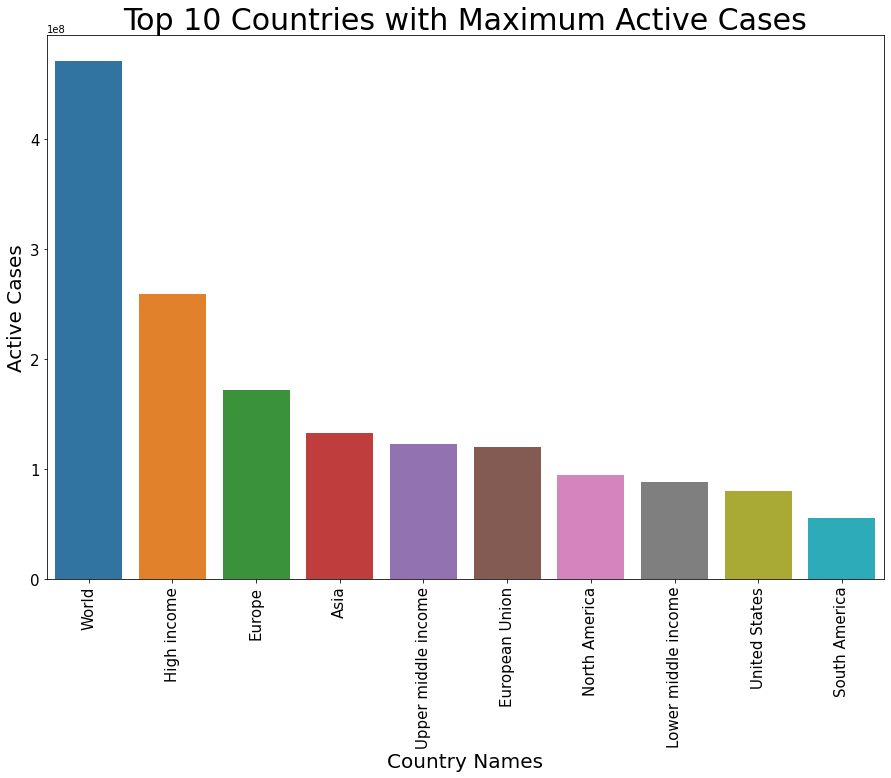

In [ ]:
plt.figure(figsize = (15,10))
plt.title('Top 10 Countries with Maximum Active Cases', size=30)
sns.barplot(x='Country', y='new_cases', data=active_cases.head(10)) 
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.xlabel('Country Names', size=20)
plt.ylabel('Active Cases', size=20)
plt.show()

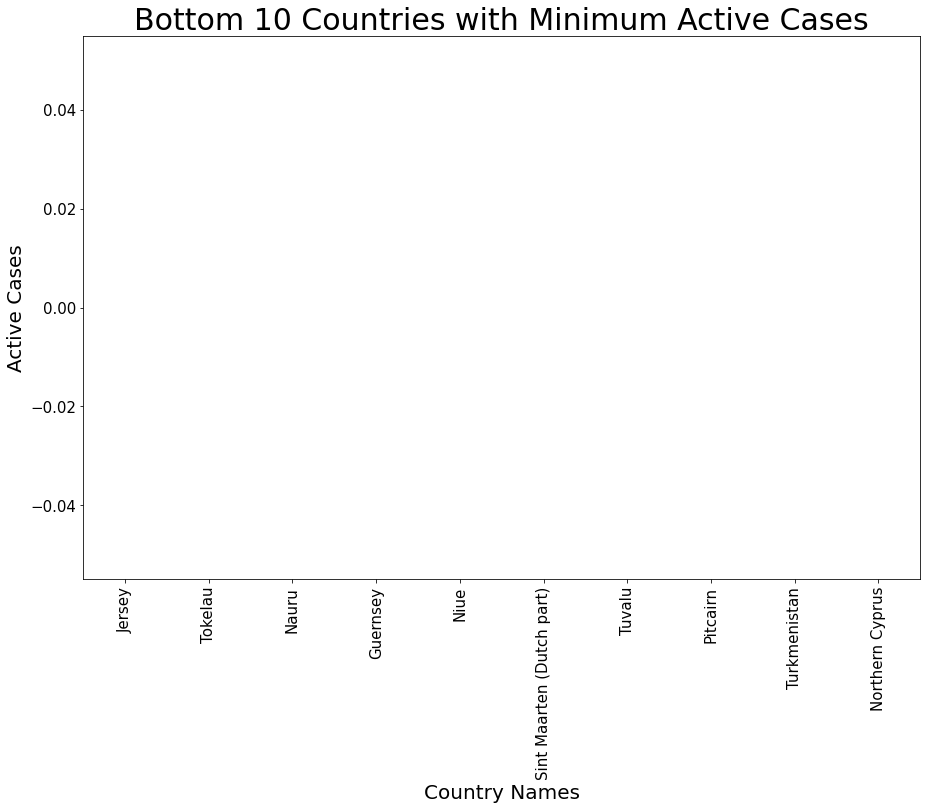

In [ ]:
plt.figure(figsize = (15,10))
plt.title('Bottom 10 Countries with Minimum Active Cases', size=30)
sns.barplot(x='Country', y='new_cases', data=active_cases.tail(10)) 
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.xlabel('Country Names', size=20)
plt.ylabel('Active Cases', size=20)
plt.show()

***Time Series Forecasting for 30 days***

In [ ]:
from fbprophet import Prophet

In [ ]:
confirmed = covid.groupby('date').sum()['total_cases'].reset_index()
deaths = covid.groupby('date').sum()['total_deaths'].reset_index()
active = covid.groupby('date').sum()['new_cases'].reset_index()

In [ ]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [ ]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [ ]:
active.columns = ['ds','y']
active['ds'] = pd.to_datetime(active['ds'])

In [ ]:
confirmed

,ds,y
0,2020-01-01,0.000000e+00
1,2020-01-02,0.000000e+00
2,2020-01-03,0.000000e+00
3,2020-01-04,0.000000e+00
4,2020-01-05,0.000000e+00
...,...,...
806,2022-03-17,1.983002e+09
807,2022-03-18,1.991249e+09
808,2022-03-19,1.998049e+09
809,2022-03-20,2.002501e+09


In [ ]:
model1 = Prophet()
model1.fit(confirmed)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
x = model1.make_future_dataframe(periods=30, freq='D')
forecast1 = model1.predict(x)

In [ ]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01,1.504943e+07,1.015850e+07,1.992665e+07
1,2020-01-02,1.117795e+07,6.097701e+06,1.583617e+07
2,2020-01-03,7.726124e+06,2.909377e+06,1.235569e+07
3,2020-01-04,4.253659e+06,-8.552923e+05,9.437226e+06
4,2020-01-05,8.555161e+05,-3.904564e+06,5.864897e+06
...,...,...,...,...
836,2022-04-16,2.185565e+09,2.165946e+09,2.205381e+09
837,2022-04-17,2.191831e+09,2.170368e+09,2.213248e+09
838,2022-04-18,2.198602e+09,2.177602e+09,2.221478e+09
839,2022-04-19,2.205724e+09,2.182373e+09,2.232144e+09


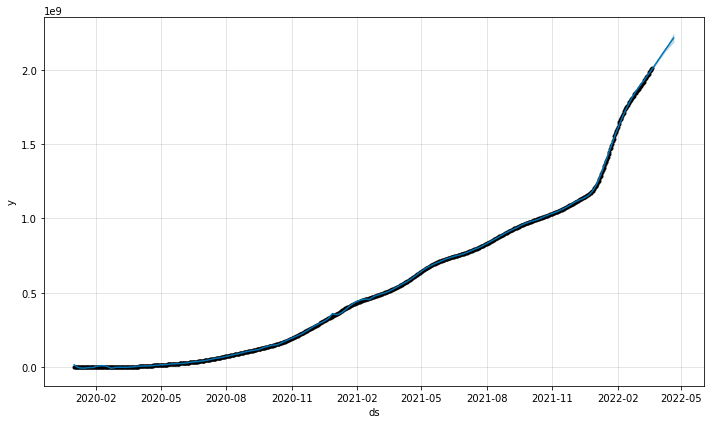

In [ ]:
confirmed_forecast_plot = model1.plot(forecast1)

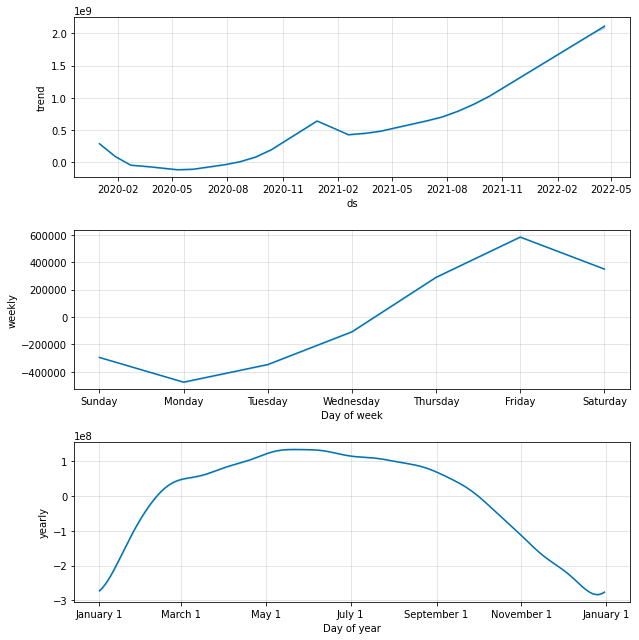

In [ ]:
confirmed_forecast = model1.plot_components(forecast1)

In [ ]:
deaths

,ds,y
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0
...,...,...
806,2022-03-17,25295596.0
807,2022-03-18,25318506.0
808,2022-03-19,25333971.0
809,2022-03-20,25346402.0


In [ ]:
model2 = Prophet()
model2.fit(deaths)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
y = model2.make_future_dataframe(periods=30, freq='D')
forecast2 = model2.predict(y)

In [ ]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01,4.410579e+04,2.707021e+04,6.253482e+04
1,2020-01-02,4.084893e+04,2.373905e+04,5.837411e+04
2,2020-01-03,3.645571e+04,1.981397e+04,5.449390e+04
3,2020-01-04,2.582294e+04,9.424799e+03,4.328354e+04
4,2020-01-05,9.227717e+03,-6.725500e+03,2.498822e+04
...,...,...,...,...
836,2022-04-16,2.646742e+07,2.637538e+07,2.654484e+07
837,2022-04-17,2.650597e+07,2.641179e+07,2.658609e+07
838,2022-04-18,2.655068e+07,2.645735e+07,2.664151e+07
839,2022-04-19,2.660449e+07,2.649030e+07,2.670147e+07


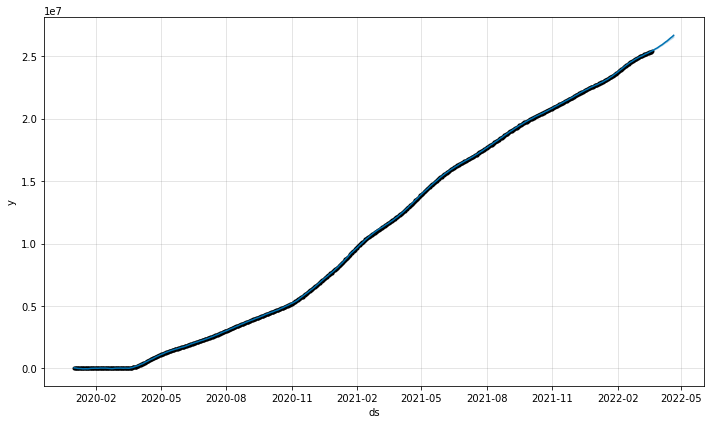

In [ ]:
deaths_forecast_plot = model2.plot(forecast2)

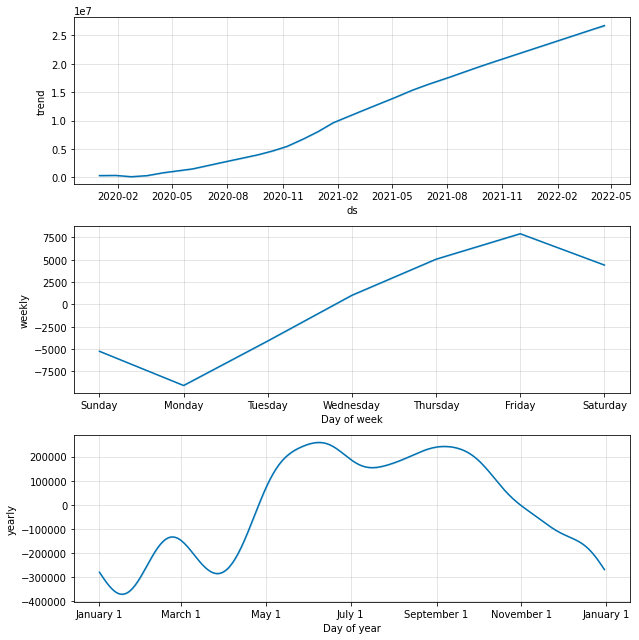

In [ ]:
deaths_forecast = model2.plot_components(forecast2)

In [ ]:
active

,ds,y
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0
...,...,...
806,2022-03-17,8926086.0
807,2022-03-18,8246867.0
808,2022-03-19,6800512.0
809,2022-03-20,4451620.0


In [ ]:
model3 = Prophet()
model3.fit(active)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
z = model3.make_future_dataframe(periods=30, freq='D')
forecast3 = model3.predict(z)

In [ ]:
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01,-1.129273e+06,-2.548763e+06,2.452520e+05
1,2020-01-02,-8.957667e+05,-2.459747e+06,6.493483e+05
2,2020-01-03,-6.986372e+05,-2.215689e+06,8.338954e+05
3,2020-01-04,-9.763469e+05,-2.488416e+06,4.908235e+05
4,2020-01-05,-1.098859e+06,-2.599406e+06,4.898272e+05
...,...,...,...,...
836,2022-04-16,1.039064e+07,8.889183e+06,1.184310e+07
837,2022-04-17,1.005348e+07,8.540939e+06,1.166877e+07
838,2022-04-18,1.051876e+07,8.932831e+06,1.207496e+07
839,2022-04-19,1.088364e+07,9.382560e+06,1.236250e+07


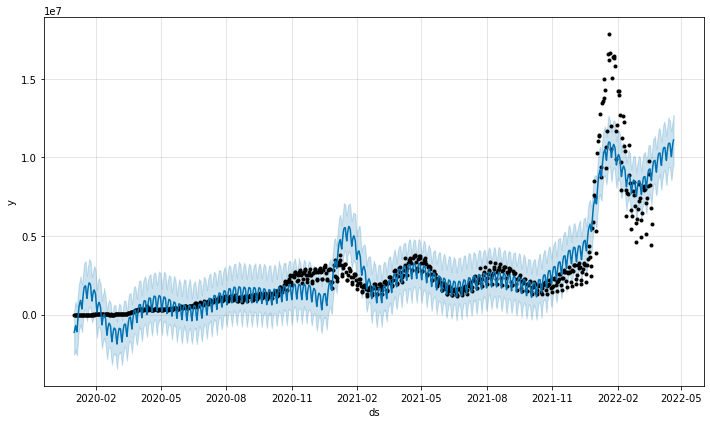

In [ ]:
active_forecast_plot = model3.plot(forecast3)

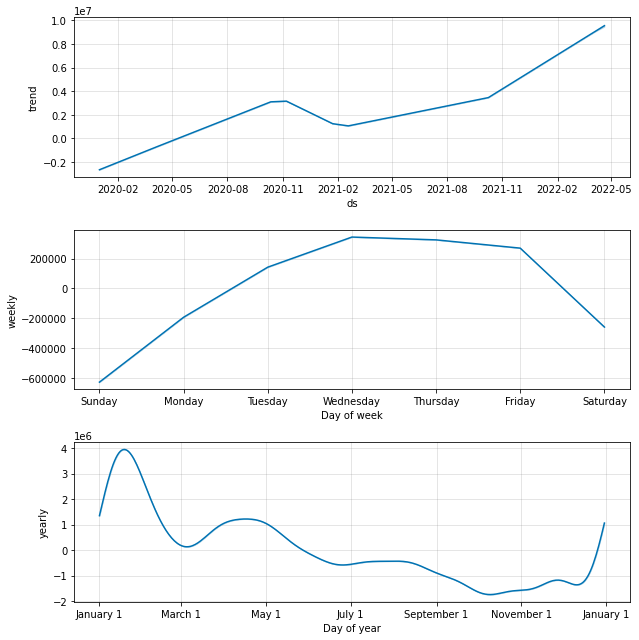

In [ ]:
active_forecast = model3.plot_components(forecast3)

In [ ]:
covid

,continent,Country,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,people_vaccinated,people_fully_vaccinated,new_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population_density,excess_mortality_cumulative_absolute
0,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.126,0.126,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,NaN
1,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.126,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,NaN
2,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.126,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,NaN
3,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.126,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,NaN
4,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.126,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170185,Africa,Zimbabwe,2022-03-17,243650.0,0.0,5418.0,0.0,16144.132,0.000,358.994,...,4413298.0,3440370.0,7090.0,29.24,22.80,2.26,3314.0,0.022,42.729,NaN
170186,Africa,Zimbabwe,2022-03-18,244012.0,362.0,5420.0,2.0,16168.118,23.986,359.127,...,4416878.0,3443003.0,10213.0,29.27,22.81,2.28,3203.0,0.021,42.729,NaN
170187,Africa,Zimbabwe,2022-03-19,244452.0,440.0,5426.0,6.0,16197.272,29.154,359.524,...,4418032.0,3443906.0,3136.0,29.27,22.82,2.29,3046.0,0.020,42.729,NaN
170188,Africa,Zimbabwe,2022-03-20,244452.0,0.0,5426.0,0.0,16197.272,0.000,359.524,...,4418956.0,3444793.0,2915.0,29.28,22.83,2.30,2961.0,0.020,42.729,NaN
